In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.legend_handler as HandlerLine2D
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.multiclass import OneVsRestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import svm, datasets
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import import_ipynb
from wines import *
import scipy.sparse as sparse
from sklearn import tree

In [77]:
wines

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,quality_label,price
1361,9.4,0.240,0.29,8.5,0.037,124.0,208.0,0.99395,2.90,0.38,11.0,3,white,low,8.7
191,6.8,0.815,0.00,1.2,0.267,16.0,29.0,0.99471,3.32,0.51,9.8,3,red,low,9.0
871,6.9,0.390,0.40,4.6,0.022,5.0,19.0,0.99150,3.31,0.37,12.6,3,white,low,8.7
1505,7.9,0.640,0.46,10.6,0.244,33.0,227.0,0.99830,2.87,0.74,9.1,3,white,low,8.7
251,9.1,0.590,0.38,1.6,0.066,34.0,182.0,0.99680,3.23,0.38,8.5,3,white,low,8.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1061,7.1,0.260,0.49,2.2,0.032,31.0,113.0,0.99030,3.37,0.42,12.9,9,white,high,10.7
3655,7.4,0.240,0.36,2.0,0.031,27.0,139.0,0.99055,3.28,0.48,12.5,9,white,high,10.7
4351,6.9,0.360,0.34,4.2,0.018,57.0,119.0,0.98980,3.28,0.36,12.7,9,white,high,10.7
2768,9.1,0.270,0.45,10.6,0.035,28.0,124.0,0.99700,3.20,0.46,10.4,9,white,high,10.7


In [73]:
wine_price_all = pd.read_csv('./wine_sales_data.csv')
wine_price_all = wine_price_all[(wine_price_all["country"] == "Portugal") & (wine_price_all["province"] == "Vinho Verde")]
wine_price_all
white_wine_price = wine_price_all[(wine_price_all["variety"] == "Portuguese White")]
red_wine_price = wine_price_all[wine_price_all["variety"] == "Rosé"]
white_wine_price.describe()
red_wine_price.describe()
# wine_price = pd.concat([white_wine_price, red_wine_price], axis= 1, keys=['White Wine Prices', 'Red Wine Prices'])
# wine_price
white_wine_price_no = white_wine_price[(white_wine_price["price"] >= white_wine_price.describe()["price"]["25%"]) & (white_wine_price["price"] <= white_wine_price.describe()["price"]["75%"])]
white_wine_price_no = white_wine_price_no.sort_values("points")

red_wine_price_no = red_wine_price[(red_wine_price["price"] >= red_wine_price.describe()["price"]["25%"]) & (red_wine_price["price"] <= red_wine_price.describe()["price"]["75%"])]
red_wine_price_no = red_wine_price_no.sort_values("points")
white_wine_points = np.array(white_wine_price_no["points"])
white_wine_price_no["rating"] = pd.cut(white_wine_points,3, labels=["low", "medium", "high"])
white_wine_lq_mean_price = float("{:.1f}".format(white_wine_price_no[white_wine_price_no["rating"] == "low"]["price"].mean()))
# wine_lq_median_price = wine_price_no[wine_price_no["rating"] == "low"]["price"].median()
white_wine_lq_min_price = float("{:.1f}".format(white_wine_price_no[white_wine_price_no["rating"] == "low"]["price"].min()))
white_wine_lq_max_price = float("{:.1f}".format(white_wine_price_no[white_wine_price_no["rating"] == "low"]["price"].max()))
white_wine_mq_mean_price = float("{:.1f}".format(white_wine_price_no[white_wine_price_no["rating"] == "medium"]["price"].mean()))
# wine_mq_median_price = wine_price_no[wine_price_no["rating"] == "medium"]["price"].median()
white_wine_mq_min_price = float("{:.1f}".format(white_wine_price_no[white_wine_price_no["rating"] == "medium"]["price"].min()))
white_wine_mq_max_price = float("{:.1f}".format(white_wine_price_no[white_wine_price_no["rating"] == "medium"]["price"].max()))
white_wine_hq_mean_price = float("{:.1f}".format(white_wine_price_no[white_wine_price_no["rating"] == "high"]["price"].mean()))
# wine_hq_median_price = wine_price_no[wine_price_no["rating"] == "high"]["price"].median()
white_wine_hq_min_price = float("{:.1f}".format(white_wine_price_no[white_wine_price_no["rating"] == "high"]["price"].min()))
white_wine_hq_max_price = float("{:.1f}".format(white_wine_price_no[white_wine_price_no["rating"] == "high"]["price"].max()))
white_wine_price_quality = pd.DataFrame(np.array([["low", white_wine_lq_mean_price, white_wine_lq_min_price, white_wine_lq_max_price], ["medium", white_wine_mq_mean_price, white_wine_mq_min_price, white_wine_mq_max_price], ["high", white_wine_hq_mean_price, white_wine_hq_min_price, white_wine_hq_max_price]]), columns=["quality", "mean_price", "min_price", "max_price"])
red_wine_points = np.array(red_wine_price_no["points"])
red_wine_price_no["rating"] = pd.cut(red_wine_points,3, labels=["low", "medium", "high"])
red_wine_lq_mean_price = float("{:.1f}".format(red_wine_price_no[red_wine_price_no["rating"] == "low"]["price"].mean()))
# wine_lq_median_price = wine_price_no[wine_price_no["rating"] == "low"]["price"].median()
red_wine_lq_min_price = float("{:.1f}".format(red_wine_price_no[red_wine_price_no["rating"] == "low"]["price"].min()))
red_wine_lq_max_price = float("{:.1f}".format(red_wine_price_no[red_wine_price_no["rating"] == "low"]["price"].max()))
red_wine_mq_mean_price = float("{:.1f}".format(red_wine_price_no[red_wine_price_no["rating"] == "medium"]["price"].mean()))
# wine_mq_median_price = wine_price_no[wine_price_no["rating"] == "medium"]["price"].median()
red_wine_mq_min_price = float("{:.1f}".format(red_wine_price_no[red_wine_price_no["rating"] == "medium"]["price"].min()))
red_wine_mq_max_price = float("{:.1f}".format(red_wine_price_no[red_wine_price_no["rating"] == "medium"]["price"].max()))
red_wine_hq_mean_price = float("{:.1f}".format(red_wine_price_no[red_wine_price_no["rating"] == "high"]["price"].mean()))
# wine_hq_median_price = wine_price_no[wine_price_no["rating"] == "high"]["price"].median()
red_wine_hq_min_price = float("{:.1f}".format(red_wine_price_no[red_wine_price_no["rating"] == "high"]["price"].min()))
red_wine_hq_max_price = float("{:.1f}".format(red_wine_price_no[red_wine_price_no["rating"] == "high"]["price"].max()))
red_wine_price_quality = pd.DataFrame(np.array([["low", red_wine_lq_mean_price, red_wine_lq_min_price, red_wine_lq_max_price], ["medium", red_wine_mq_mean_price, red_wine_mq_min_price, red_wine_mq_max_price], ["high", red_wine_hq_mean_price, red_wine_hq_min_price, red_wine_hq_max_price]]), columns=["quality", "mean_price", "min_price", "max_price"])
# wine_price_quality_stats = pd.concat([white_wine_price_quality, red_wine_price_quality], axis= 1, keys=['White Wine Prices', 'Red Wine Prices'])
# wine_price_quality_stats


In [28]:
conditions = [
    ((wines["wine_type"] == "white") & (wines["quality_label"] == "low")),
    ((wines["wine_type"] == "white") & (wines["quality_label"] == "medium")),
    ((wines["wine_type"] == "white") & (wines["quality_label"] == "high")),
    ((wines["wine_type"] == "red") & (wines["quality_label"] == "low")),
    ((wines["wine_type"] == "red") & (wines["quality_label"] == "medium")),
    ((wines["wine_type"] == "red") & (wines["quality_label"] == "high")),
]
values = [float(white_wine_price_quality[white_wine_price_quality["quality"] == "low"]["mean_price"][0]), float(white_wine_price_quality[white_wine_price_quality["quality"] == "medium"]["mean_price"][1]), float(white_wine_price_quality[white_wine_price_quality["quality"] == "high"]["mean_price"][2]), float(red_wine_price_quality[red_wine_price_quality["quality"] == "low"]["mean_price"][0]), float(red_wine_price_quality[red_wine_price_quality["quality"] == "medium"]["mean_price"][1]), float(red_wine_price_quality[red_wine_price_quality["quality"] == "high"]["mean_price"][2])]

wines["price"] = np.select(conditions, values)


In [140]:
wpp_features = wines.drop(columns=["quality", "quality_label", "price"], axis=1)
wpp_features = pd.get_dummies(wpp_features)
wpp_class_labels = np.array(wines['price'])
wpp_label_names = list(map(lambda x: str(x), wines['price'].unique()))
wpp_feature_names = list(wpp_features.columns)
wpp_categories = list(wpp_features.columns.values)
wpp_train_X, wpp_test_X, wpp_train_y, wpp_test_y = train_test_split(wpp_features,
wpp_class_labels, test_size=0.3, random_state=42)
print(Counter(wpp_train_y), Counter(wpp_test_y))
print('Features:', wpp_feature_names)

Counter({9.4: 2169, 8.7: 1134, 9.2: 579, 9.0: 525, 10.7: 128, 10.6: 12}) Counter({9.4: 909, 8.7: 506, 9.2: 258, 9.0: 219, 10.7: 52, 10.6: 6})
Features: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'wine_type_red', 'wine_type_white']


In [141]:
# Define the scaler
wpp_ss = StandardScaler().fit(wpp_train_X)
# Scale the train set
wpp_train_SX = wpp_ss.transform(wpp_train_X)
# Scale the test set
wpp_test_SX = wpp_ss.transform(wpp_test_X)
lab_enc = preprocessing.LabelEncoder()
wpp_train_y_encoded = lab_enc.fit_transform(wpp_train_y)
wpp_test_y_encoded = lab_enc.fit_transform(wpp_test_y)

In [145]:
wpp_rf = RandomForestClassifier(random_state=42, n_estimators=80, criterion="entropy", bootstrap=True, max_depth=30, oob_score=True, min_samples_split=2, min_samples_leaf=1, max_leaf_nodes=800)
wpp_rf.fit(wpp_train_SX, wpp_train_y_encoded)
# predict and evaluate performance
wpp_rf_predictions = wpp_rf.predict(wpp_test_SX)
print(classification_report(wpp_test_y_encoded,wpp_rf_predictions, target_names=wpp_label_names))
print("accuracy", accuracy_score(wpp_test_y_encoded,wpp_rf_predictions))
# wpp_confusion_matrix = confusion_matrix(wpp_test_y,wpp_rf_predictions)
print("kappa", cohen_kappa_score(wpp_test_y_encoded, wpp_rf_predictions))
# print(wpp_confusion_matrix)
# cm_display = ConfusionMatrixDisplay(wpp_confusion_matrix, display_labels=wpp_label_names).plot()

              precision    recall  f1-score   support

         8.7       0.81      0.63      0.71       506
         9.0       0.78      0.76      0.77       219
         9.4       0.78      0.81      0.80       258
         9.2       0.80      0.92      0.85       909
        10.7       1.00      0.17      0.29         6
        10.6       0.95      0.38      0.55        52

    accuracy                           0.80      1950
   macro avg       0.85      0.61      0.66      1950
weighted avg       0.80      0.80      0.79      1950

accuracy 0.7958974358974359
kappa 0.6933585516061239


In [146]:
wpp_rf = RandomForestRegressor(random_state=42, n_estimators=80)
wpp_rf.fit(wpp_train_SX, wpp_train_y)
# predict and evaluate performance
wpp_rf_predictions = wpp_rf.predict(wpp_test_SX)
errors = abs(wpp_rf_predictions - wpp_test_y)
print(errors)
# Display the performance metrics
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mape = np.mean(100 * (errors / wpp_test_y))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')
# print(classification_report(wpp_test_y,wpp_rf_predictions, target_names=wpp_label_names))
# print("accuracy", accuracy_score(wpp_test_y,wpp_rf_predictions))
# wpp_confusion_matrix = confusion_matrix(wpp_test_y,wpp_rf_predictions)
# print("kappa", cohen_kappa_score(wpp_test_y, wpp_rf_predictions))
# print(wpp_confusion_matrix)
# cm_display = ConfusionMatrixDisplay(wpp_confusion_matrix, display_labels=wpp_label_names).plot()
# wpp_test_y_reshaped = wpp_test_y.reshape(-1, 1)
# wpp_rf_predictions_reshaped = wpp_rf_predictions.reshape(-1, 1)
# print(wpp_test_y.reshape(-1, 1))
# print(wpp_rf_predictions.reshape(-1, 1))
# print(wpp_rf.score(wpp_test_y, wpp_rf_predictions))

[0.26    0.37625 0.02    ... 0.15    0.0325  0.125  ]
Mean Absolute Error: 0.19 degrees.
Accuracy: 97.96 %.


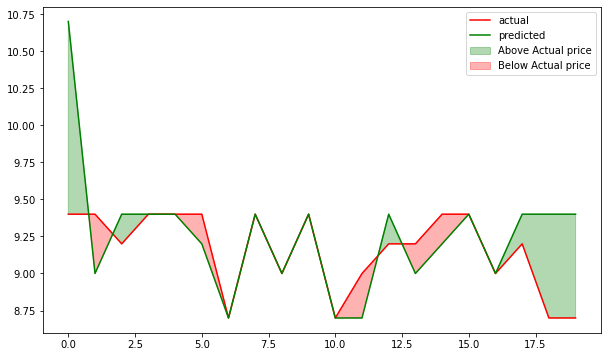

In [215]:
actual_price = wines["price"].sample(20).sort_index()
actual_price = actual_price.reset_index(drop=True)
predicted_price = wines.loc[actual_price.index, ["price"]]
predicted_price = predicted_price.reset_index(drop=True)
predicted_price = predicted_price.iloc[:, 0]

prices_prediction_df = pd.concat([actual_price, predicted_price], axis=1, keys=['actual_price', 'predicted_price'])
prices_prediction_df

fig = plt.figure(figsize=(10, 6))
# plt.bar(prices_prediction_df.index, prices_prediction_df["actual_price"], label = 'actual')
# ax = sns.barplot(x=prices_prediction_df.index, y="actual_price", data=prices_prediction_df)
# ax = sns.lineplot(data=prices_prediction_df, x=prices_prediction_df.index, y="predicted_price")
plt.plot(prices_prediction_df.index, prices_prediction_df["actual_price"], "r", label = 'actual')
plt.plot(prices_prediction_df.index, prices_prediction_df["predicted_price"], "g", label = 'predicted')
plt.fill_between(prices_prediction_df.index,prices_prediction_df["actual_price"], prices_prediction_df["predicted_price"],  where=(prices_prediction_df["actual_price"] < prices_prediction_df["predicted_price"]), alpha=0.30, color='green', label='Above Actual price', interpolate=True)
plt.fill_between(prices_prediction_df.index,prices_prediction_df["actual_price"], prices_prediction_df["predicted_price"],  where=(prices_prediction_df["actual_price"] >= prices_prediction_df["predicted_price"]), alpha=0.30, color='red', label='Below Actual price', interpolate=True)
plt.legend()

In [188]:
prices_prediction_df

,actual_price,predicted_price
0,9.2,10.7
1,8.7,9.0
2,9.2,9.4
3,8.7,9.4
4,9.4,9.4
5,9.2,9.2
6,9.4,8.7
7,9.2,9.4
8,9.4,9.0
9,8.7,9.4


In [138]:
mean_squared_error(wpp_test_y, wpp_rf_predictions)

0.08469408669426631